# DATA LOAD

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import pywt
#from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [8]:
data_dir = '2nd_test'
select_function = 'db2'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    #cA, cD = pywt.dwt(dataset.T, select_function)
    #cacd = pd.concat([pd.DataFrame(cA.T),pd.DataFrame(cD.T)],axis= 1)
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1_cA','Bearing 1_cD','Bearing 2_cA','Bearing 2_cD','Bearing 3_cA','Bearing 3_cD','Bearing 4_cA','Bearing 4_cD']

2004.02.12.10.32.39


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [91]:
merged_data

,Bearing 1_cA,Bearing 1_cD,Bearing 2_cA,Bearing 2_cD,Bearing 3_cA,Bearing 3_cD,Bearing 4_cA,Bearing 4_cD
2004.02.12.10.32.39,0.073090,0.086695,0.091760,0.054927,0.037975,0.053075,0.073398,0.026312
2004.02.12.10.42.39,0.073364,0.087937,0.093752,0.056184,0.039877,0.056249,0.075001,0.028332
2004.02.12.10.52.39,0.075101,0.089710,0.091961,0.056530,0.039849,0.054447,0.075109,0.027571
2004.02.12.11.02.39,0.076917,0.088532,0.092986,0.057156,0.040859,0.055125,0.075517,0.028179
2004.02.12.11.12.39,0.076700,0.091090,0.090529,0.057115,0.040746,0.055646,0.074390,0.028214
...,...,...,...,...,...,...,...,...
2004.02.19.05.42.39,0.548483,0.206473,0.174188,0.154763,0.336206,0.094538,0.088149,0.066657
2004.02.19.05.52.39,0.394724,0.163741,0.188090,0.116404,0.266505,0.092005,0.085341,0.059296
2004.02.19.06.02.39,0.424467,0.197481,0.196875,0.129054,0.262992,0.085935,0.084350,0.060233
2004.02.19.06.12.39,0.002633,0.005277,0.005170,0.002535,0.000435,0.000461,0.000566,0.000397


In [98]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('db2_merged_dataset_BearingTest_2.csv',index= False)
merged_data.head()

,Bearing 1_cA,Bearing 1_cD,Bearing 2_cA,Bearing 2_cD,Bearing 3_cA,Bearing 3_cD,Bearing 4_cA,Bearing 4_cD
2004-02-12 10:32:39,0.073090,0.086695,0.091760,0.054927,0.037975,0.053075,0.073398,0.026312
2004-02-12 10:42:39,0.073364,0.087937,0.093752,0.056184,0.039877,0.056249,0.075001,0.028332
2004-02-12 10:52:39,0.075101,0.089710,0.091961,0.056530,0.039849,0.054447,0.075109,0.027571
2004-02-12 11:02:39,0.076917,0.088532,0.092986,0.057156,0.040859,0.055125,0.075517,0.028179
2004-02-12 11:12:39,0.076700,0.091090,0.090529,0.057115,0.040746,0.055646,0.074390,0.028214


# PRE PROCESSING
- 정상만 있는 구간을 TRAIN 이후 5일 정도를 TEST로 나눔
- abs().mean() 추출 (10분 간격의 파일에서) 

<AxesSubplot:>

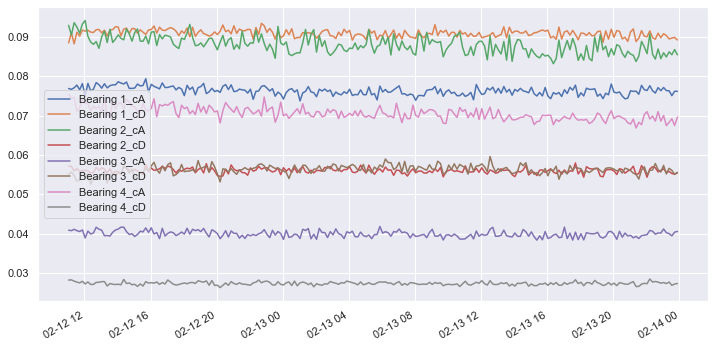

In [93]:
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (12,6))

<AxesSubplot:>

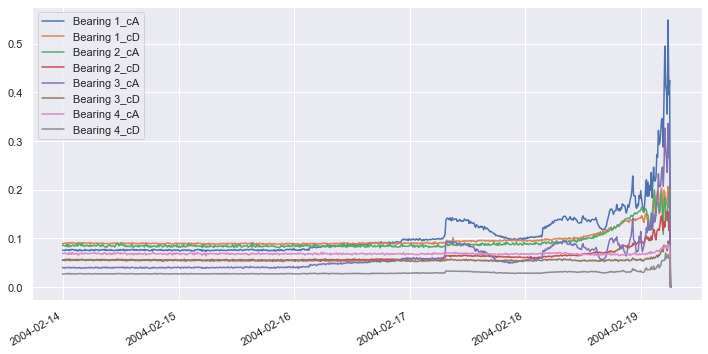

In [94]:
dataset_test.plot(figsize = (12,6))

+ MIN-MAX SCALER

In [95]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

<AxesSubplot:>

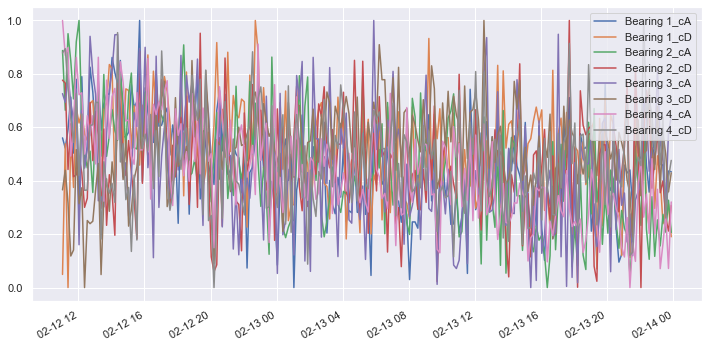

In [96]:
X_train.plot(figsize = (12,6))

<AxesSubplot:>

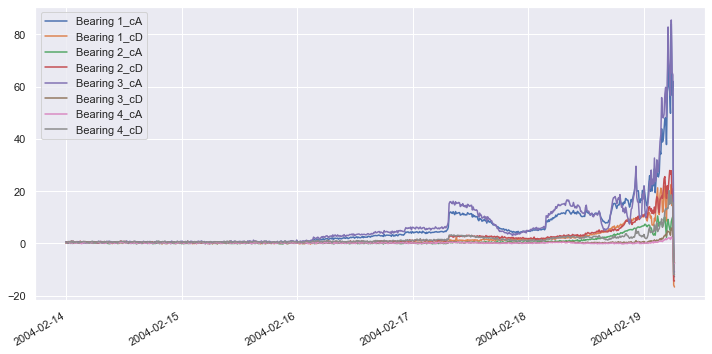

In [97]:
X_test.plot(figsize = (12,6))

# MIN, MAX, STD, SKewness 등 뽑았을 경우 저장
##### https://github.com/mohan696matlab/IMS-Bearing-Fault-Diagnosis/blob/main/IMS%20bearing%20features%20extraction.ipynb

+ 각 bearing 마다 파일 저장

In [11]:
path='2nd_test'
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
bearing_no=1
bearing_data = np.array(dataset.iloc[:,bearing_no-1])
temp = bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [12]:
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3


feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df


Time_feature_matrix=pd.DataFrame()



,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004.02.12.10.42,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004.02.12.10.52,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004.02.12.11.02,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004.02.12.11.12,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004.02.19.05.52,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004.02.19.06.02,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004.02.19.06.12,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


In [ ]:
test_set=2

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set

path='2nd_test'

for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)
    
Time_feature_matrix

In [28]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


# Plot
+ Maximum value
+ Minimum value
+ Mean value
+ Standard deviation (Unbiased std)
+ Root mean square value (RMS)
+ Skewness
+ Kurtosis
+ Crest factor = $\frac{\text{Max}}{\text{RMS}}$
+ Form factor = $\frac{\text{RMS}}{\text{Mean}}$

In [29]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv",index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv",index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv",index_col='Unnamed: 0')

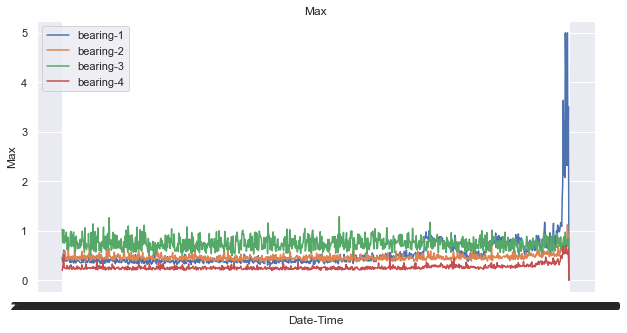

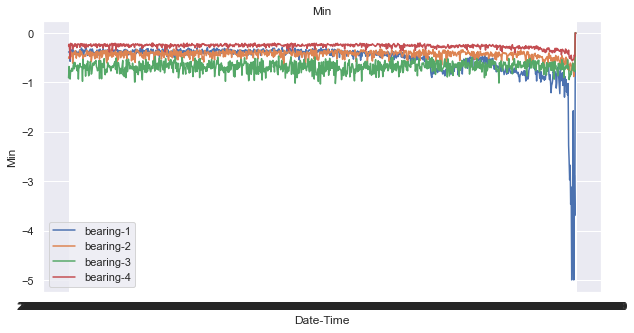

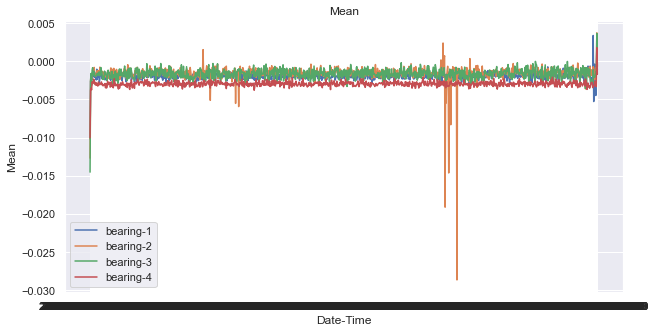

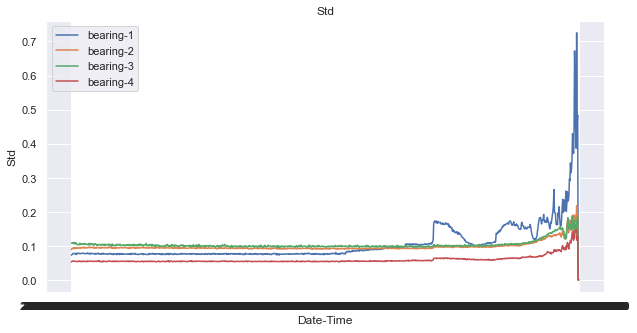

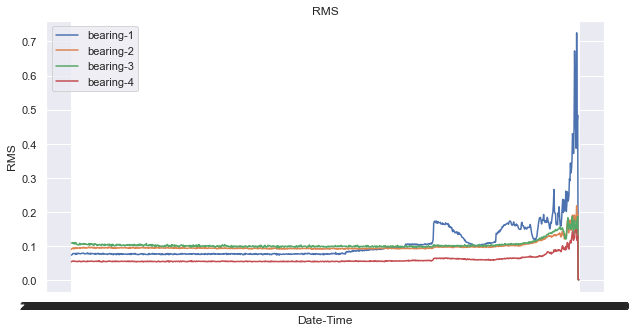

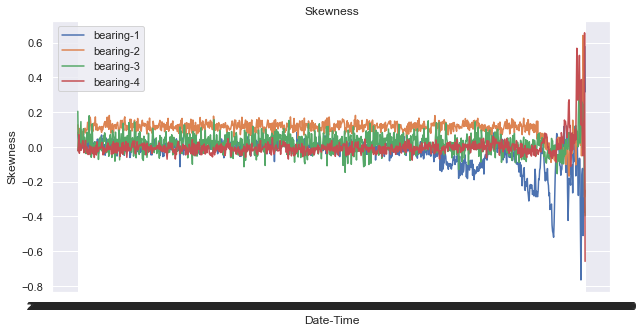

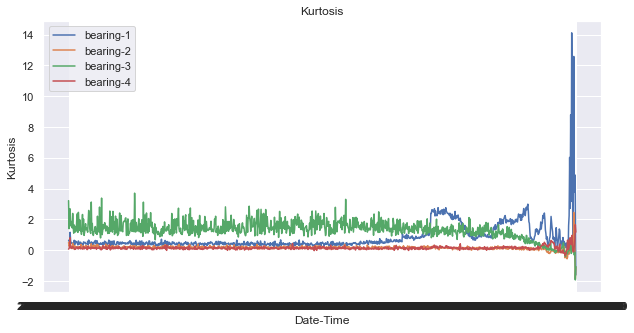

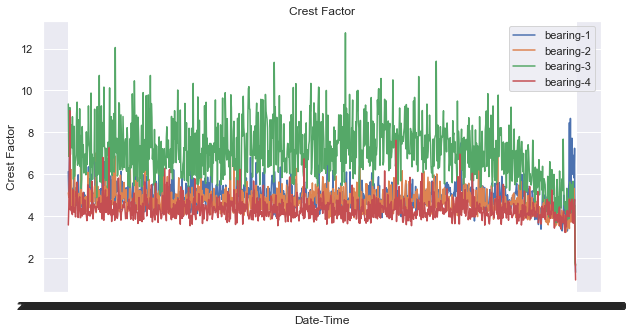

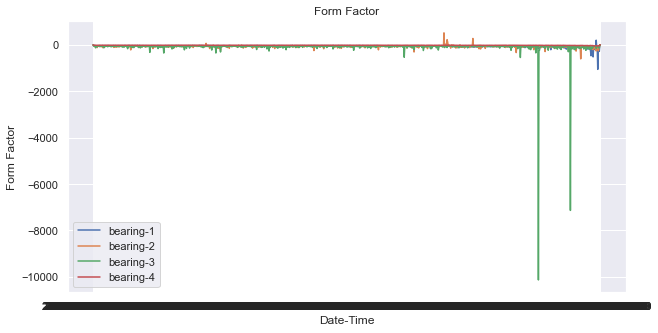

In [30]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Wavelet
## DWT - 노이즈 자동 제거 효과
+ 방법이 너무 많음
+ 어떤 것을 사용해야 할지에 대한 고민 필요 혹은 조합 방법 
+ -> 모델 생성 후 실험적으로 접근 VS 데이터의 특성 파악해서 선택
+ cA (approximation)는 저주파만 남김, cD(detail)은 고주파만 남겼다고 볼 수 있음
+ "dbn"의 n에 따라 남겨지는 정도가 다르다. 

In [ ]:
data_dir = '2nd_test'
select_function = 'db2'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    cA, cD = pywt.dwt(dataset.T, select_function)
    cacd = pd.concat([pd.DataFrame(cA.T),pd.DataFrame(cD.T)],axis= 1)
    dataset_mean_abs = np.array(cacd.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1_cA','Bearing 1_cD','Bearing 2_cA','Bearing 2_cD','Bearing 3_cA','Bearing 3_cD','Bearing 4_cA','Bearing 4_cD']

In [39]:
#dwt 함수 종류
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [82]:
select_function = 'db2'
cA, cD = pywt.dwt(merged_data.T, select_function)

In [83]:
cA.T.shape

(493, 4)

In [63]:
print("변환 전 길이:",len(merged_data['Bearing 1']))
print("wavelet 변환 후 길이:",len(cA))

변환 전 길이: 984
wavelet 변환 후 길이: 493


<AxesSubplot:>

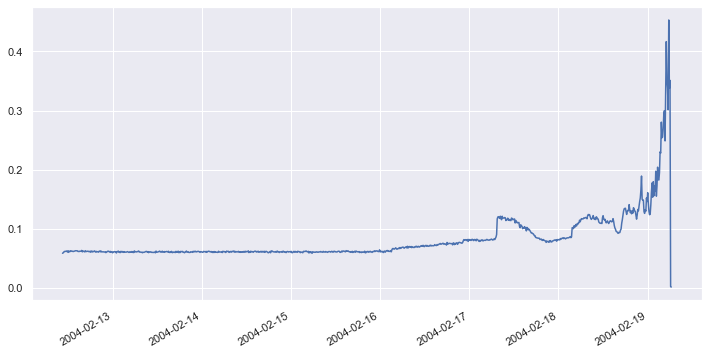

In [64]:
pd.Series(merged_data['Bearing 1']).plot(figsize = (12,6))

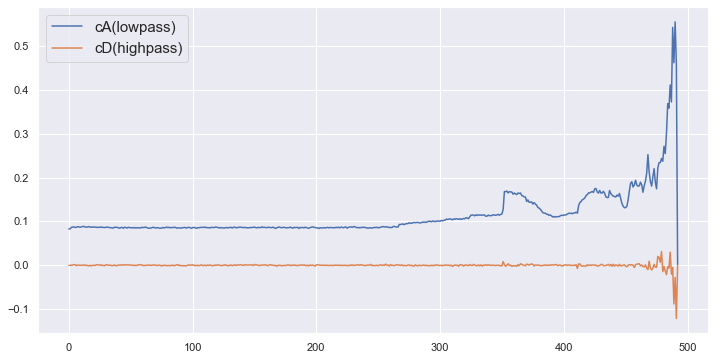

In [65]:
#merged_data['Bearing 1'].plot(figsize = (12,6))
pd.Series(cA).plot(figsize = (12,6))#lowpass
pd.Series(cD).plot(figsize = (12,6)) #highpass
plt.legend(['cA(lowpass)', 'cD(highpass)'],fontsize=15)

### CWT (스펙트로그램 생성)
+ scipy를 통한 low, high를 통해 주파수 필터를 따로 생성
+ a scale factor, b shift facotr를 통해 다양한 스펙트로그램 생성 가능

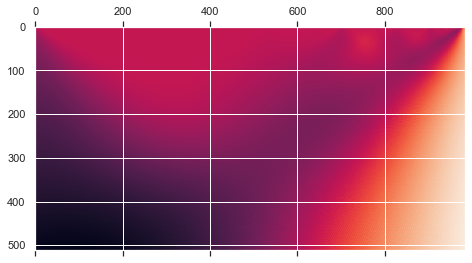

In [111]:
# 스펙트로그램에서는 시간축과 주파수 축의 변화에 따라 
#진폭의 차이를 인쇄 농도 / 표시 색상의 차이로 나타낸다.

>>> x = np.arange(512)
>>> y = np.sin(2*np.pi*x/32)
>>> coef, freqs=pywt.cwt(merged_data['Bearing 1'],np.arange(1,512),'gaus1')
>>> plt.matshow(coef) # doctest: +SKIP
>>> plt.show() # doctest: +SKIP

<AxesSubplot:>

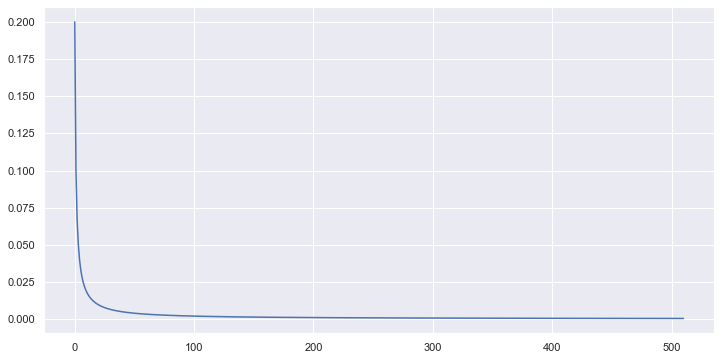

In [112]:
pd.Series(freqs).plot(figsize = (12,6))

In [72]:
coef.shape

(128, 984)